In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [16]:
books=pd.read_csv('BX-Books.csv',sep=';',error_bad_lines=False,encoding="latin-1")
books.columns = ['ISBN', 'bookTitle', 'bookAuthor', 'yearOfPublication', 'publisher', 'imageUrlS', 'imageUrlM', 'imageUrlL']


b'Skipping line 6452: expected 8 fields, saw 9\nSkipping line 43667: expected 8 fields, saw 10\nSkipping line 51751: expected 8 fields, saw 9\n'
b'Skipping line 92038: expected 8 fields, saw 9\nSkipping line 104319: expected 8 fields, saw 9\nSkipping line 121768: expected 8 fields, saw 9\n'
b'Skipping line 144058: expected 8 fields, saw 9\nSkipping line 150789: expected 8 fields, saw 9\nSkipping line 157128: expected 8 fields, saw 9\nSkipping line 180189: expected 8 fields, saw 9\nSkipping line 185738: expected 8 fields, saw 9\n'
b'Skipping line 209388: expected 8 fields, saw 9\nSkipping line 220626: expected 8 fields, saw 9\nSkipping line 227933: expected 8 fields, saw 11\nSkipping line 228957: expected 8 fields, saw 10\nSkipping line 245933: expected 8 fields, saw 9\nSkipping line 251296: expected 8 fields, saw 9\nSkipping line 259941: expected 8 fields, saw 9\nSkipping line 261529: expected 8 fields, saw 9\n'


In [46]:
rating=pd.read_csv('BX-Book-Ratings.csv',sep=';',encoding='latin-1',error_bad_lines=False)
rating.columns = ['userID', 'ISBN', 'bookrating']

In [43]:
users=pd.read_csv('BX-Users.csv',sep=';',encoding='latin-1',error_bad_lines=False)
users.columns = ['userID', 'Location', 'Age']

In [29]:
print(users.head())
print("------------------------------")
print(users.isnull().sum())


   User-ID                            Location   Age
0        1                  nyc, new york, usa   NaN
1        2           stockton, california, usa  18.0
2        3     moscow, yukon territory, russia   NaN
3        4           porto, v.n.gaia, portugal  17.0
4        5  farnborough, hants, united kingdom   NaN
------------------------------
User-ID          0
Location         0
Age         110762
dtype: int64


In [112]:
print(rating.head())
print('----------------------------------')
print(rating.isnull().sum())

      userID        ISBN  bookrating
9744     183  058608195X           0
9745     183   100940/86           9
9746     183    10622/86           0
9747     183    10745/85           0
9748     183    10756/85           0
----------------------------------
userID        0
ISBN          0
bookrating    0
dtype: int64


In [36]:
print(books.head())
print("-----------------------------------------------")
print(books.isnull().sum())

         ISBN                                          bookTitle  \
0  0195153448                                Classical Mythology   
1  0002005018                                       Clara Callan   
2  0060973129                               Decision in Normandy   
3  0374157065  Flu: The Story of the Great Influenza Pandemic...   
4  0393045218                             The Mummies of Urumchi   

             bookAuthor yearOfPublication                   publisher  \
0    Mark P. O. Morford              2002     Oxford University Press   
1  Richard Bruce Wright              2001       HarperFlamingo Canada   
2          Carlo D'Este              1991             HarperPerennial   
3      Gina Bari Kolata              1999        Farrar Straus Giroux   
4       E. J. W. Barber              1999  W. W. Norton &amp; Company   

                                           imageUrlS  \
0  http://images.amazon.com/images/P/0195153448.0...   
1  http://images.amazon.com/images/P/000

In [47]:
print(rating.shape)
print(rating.columns)

(1149780, 3)
Index(['userID', 'ISBN', 'bookrating'], dtype='object')


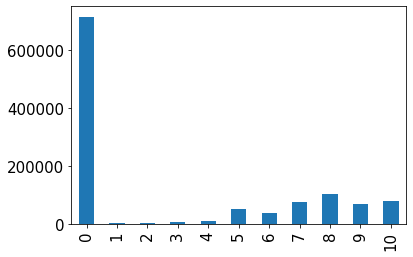

In [56]:
plt.rc("font", size=15)
rating.bookrating.value_counts(sort=False).plot(kind='bar')

In [58]:
users.columns

Index(['userID', 'Location', 'Age'], dtype='object')

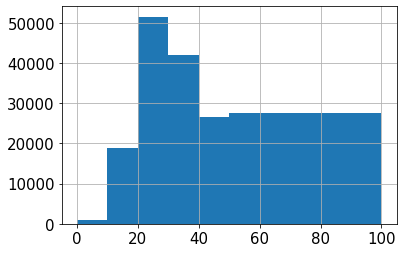

In [63]:
users.Age.hist(bins=[0, 10, 20, 30, 40, 50, 100])

#Based on top Rating

In [64]:
rating.columns

Index(['userID', 'ISBN', 'bookrating'], dtype='object')

In [70]:
rating_count=pd.DataFrame(rating.groupby('ISBN')['bookrating'].count())
rating_count.sort_values('bookrating', ascending=False).head()


,bookrating
ISBN,
0971880107,2502
0316666343,1295
0385504209,883
0060928336,732
0312195516,723


In [76]:
#now merge with book via isbn
most_rated_book=pd.merge(rating_count,books,on='ISBN')
most_rated_book.sort_values('bookrating',ascending=False).head(5)

,ISBN,bookrating,bookTitle,bookAuthor,yearOfPublication,publisher,imageUrlS,imageUrlM,imageUrlL
215952,0971880107,2502,Wild Animus,Rich Shapero,2004,Too Far,http://images.amazon.com/images/P/0971880107.0...,http://images.amazon.com/images/P/0971880107.0...,http://images.amazon.com/images/P/0971880107.0...
38570,0316666343,1295,The Lovely Bones: A Novel,Alice Sebold,2002,"Little, Brown",http://images.amazon.com/images/P/0316666343.0...,http://images.amazon.com/images/P/0316666343.0...,http://images.amazon.com/images/P/0316666343.0...
70798,0385504209,883,The Da Vinci Code,Dan Brown,2003,Doubleday,http://images.amazon.com/images/P/0385504209.0...,http://images.amazon.com/images/P/0385504209.0...,http://images.amazon.com/images/P/0385504209.0...
7344,0060928336,732,Divine Secrets of the Ya-Ya Sisterhood: A Novel,Rebecca Wells,1997,Perennial,http://images.amazon.com/images/P/0060928336.0...,http://images.amazon.com/images/P/0060928336.0...,http://images.amazon.com/images/P/0060928336.0...
32370,0312195516,723,The Red Tent (Bestselling Backlist),Anita Diamant,1998,Picador USA,http://images.amazon.com/images/P/0312195516.0...,http://images.amazon.com/images/P/0312195516.0...,http://images.amazon.com/images/P/0312195516.0...


In [78]:
average_rating=pd.DataFrame(rating.groupby('ISBN')['bookrating'].mean())
average_rating['count']=pd.DataFrame(rating.groupby('ISBN')['bookrating'].count())
average_rating.sort_values('count', ascending=False).head()


,bookrating,count
ISBN,,
0971880107,1.019584,2502
0316666343,4.468726,1295
0385504209,4.652322,883
0060928336,3.448087,732
0312195516,4.334716,723


In [83]:
counts1 = rating['userID'].value_counts()


11676     13602
198711     7550
153662     6109
98391      5891
35859      5850
Name: userID, dtype: int64

In [86]:
counts = rating['bookrating'].value_counts()
counts.head()

0     716109
8     103736
10     78610
7      76457
9      67541
Name: bookrating, dtype: int64

In [91]:
rating=rating[rating['userID'].isin(counts1[counts1>=100].index)]

In [90]:
rating=rating[rating['bookrating'].isin(counts[counts>=200].index)]

In [92]:
rating.head()

,userID,ISBN,bookrating
412,276925,0006511929,0
413,276925,002542730X,10
414,276925,0060520507,0
415,276925,0060930934,0
416,276925,0060951303,0


In [93]:
#average_rating['count'].head()

ISBN
 0330299891    2
 0375404120    2
 0586045007    1
 9022906116    2
 9032803328    1
Name: count, dtype: int64

In [106]:
rating_pivot=rating.pivot(index='userID',columns='ISBN').bookrating
rating.pivot

ValueError: array is too big; `arr.size * arr.dtype.itemsize` is larger than the maximum possible size.

In [105]:
import gc
gc.collect()

341261

In [ ]:
bones_ratings = rating_pivot['0316666343']
similar_to_bones = rating_pivot.corrwith(bones_ratings)
corr_bones = pd.DataFrame(similar_to_bones, columns=['pearsonR'])
corr_bones.dropna(inplace=True)
corr_summary = corr_bones.join(average_rating['count')
corr_summary[corr_summary['count']>=300].sort_values('pearsonR', ascending=False).head(10)

In [ ]:
books_corr_to_bones = pd.DataFrame(['0312291639', '0316601950', '0446610038', '0446672211', '0385265700', '0345342968', '0060930535', '0375707972', '0684872153'], 
                                  index=np.arange(9), columns=['ISBN'])
corr_books = pd.merge(books_corr_to_bones, books, on='ISBN')
corr_books